# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [49]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

Goal is to predict whether a possum lives in Victoria or Other.

### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [28]:
df = pd.read_csv('data/possum.csv')
df

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0
...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5
100,7,other,m,1.0,88.6,54.7,82.5,39.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   pop       46 non-null     float64
 2   age       104 non-null    float64
 3   head_l    104 non-null    float64
 4   skull_w   104 non-null    float64
 5   total_l   104 non-null    float64
 6   tail_l    104 non-null    float64
 7   sex_test  104 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 6.6 KB


In [4]:
df.isnull().sum()

site       0
pop        0
sex        0
age        2
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [40]:
df['pop'].value_counts()

0.0    58
1.0    46
Name: pop, dtype: int64

In [8]:
# baseline accuracy is 55.8%
# for a model to predict 'other' it would be right 55.8% of the time
# for regression, this is the model's performance if I guessed the mean each time
# mean_absolute_error, r_squared, mean_squared_error
# see DummyRegressor
# for classification, the percentage in the majority class
df['pop'].value_counts(normalize=True)

other    0.557692
Vic      0.442308
Name: pop, dtype: float64

### Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [9]:
df.isnull().sum()

site       0
pop        0
sex        0
age        2
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [29]:
# deal with the missing values
# fill nulls with mean
df['age'].fillna(df['age'].mean(), inplace=True)

In [23]:
# cannot do any modeling with any missing values
df.isnull().sum()

site       0
pop        0
sex        0
age        0
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [16]:
df.dtypes

site         int64
pop         object
sex         object
age        float64
head_l     float64
skull_w    float64
total_l    float64
tail_l     float64
dtype: object

In [30]:
df['sex_test'] = df['sex'].map({'m':1,'f':0})
df.drop('sex', axis=1, inplace=True)
df.head()

,site,pop,age,head_l,skull_w,total_l,tail_l,sex_test
0,1,Vic,8.0,94.1,60.4,89.0,36.0,1
1,1,Vic,6.0,92.5,57.6,91.5,36.5,0
2,1,Vic,6.0,94.0,60.0,95.5,39.0,0
3,1,Vic,6.0,93.2,57.1,92.0,38.0,0
4,1,Vic,2.0,91.5,56.3,85.5,36.0,0


In [31]:
df['pop'] = df['pop'].map({'Vic':1, 'other': 0})

In [39]:
# check that step worked
df.isnull().sum()

In [32]:
df.dtypes

site          int64
pop         float64
age         float64
head_l      float64
skull_w     float64
total_l     float64
tail_l      float64
sex_test      int64
dtype: object

### Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

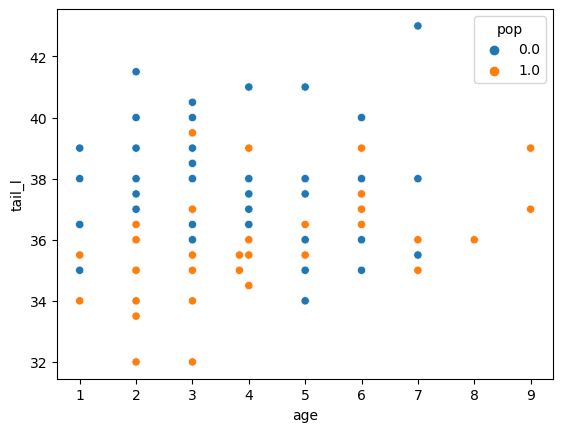

In [41]:
sns.scatterplot(x=df['age'], y=df['tail_l'], hue=df['pop'], alpha=1);

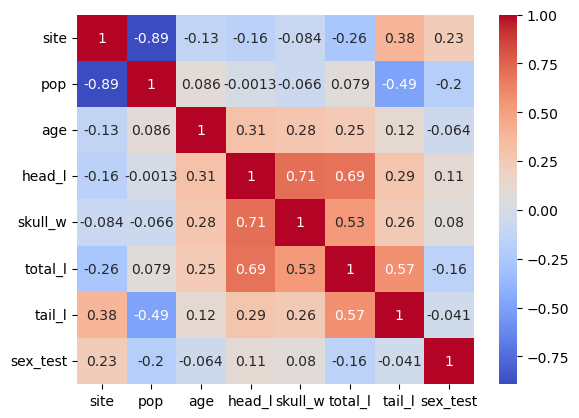

In [45]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [48]:
# setup X and y
X = df.drop('pop', axis=1)
y = df['pop']

In [50]:
# setup train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [51]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
      

0.0    0.557692
1.0    0.442308
Name: pop, dtype: float64
0.0    0.564103
1.0    0.435897
Name: pop, dtype: float64
0.0    0.538462
1.0    0.461538
Name: pop, dtype: float64


In [54]:
# instantiate model
# solver prevents max iteration error
logreg = LogisticRegression(random_state=42, solver='liblinear')

In [55]:
# on training set
logreg.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [56]:
# score for regression is r2
# score for classification is accuracy
logreg.score(X_train, y_train)

1.0

In [57]:
# how well it performs on unseen data
# beats 55.8% originally
logreg.score(X_test, y_test)

0.9615384615384616

In [58]:
logreg.predict(X_test)

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0.])

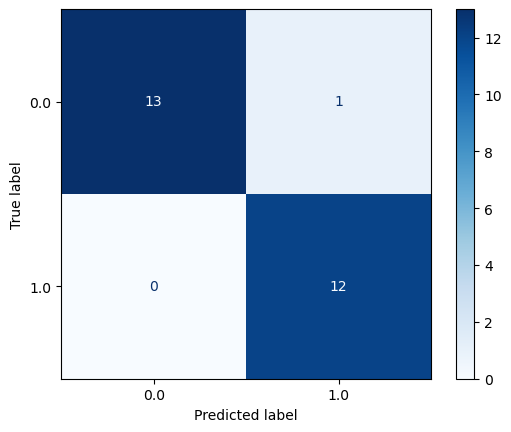

In [60]:
# this is cool - displays truth matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Blues');

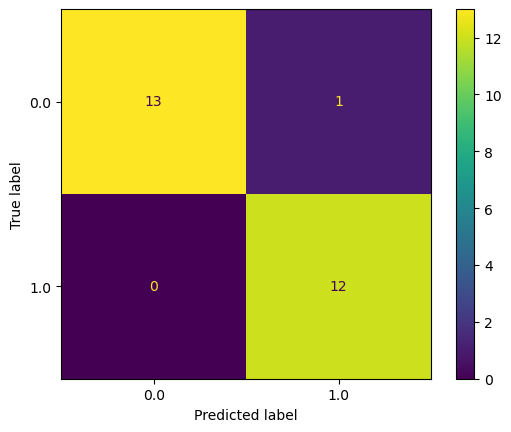

In [63]:
ConfusionMatrixDisplay.from_predictions(y_pred=logreg.predict(X_test), y_true=y_test);

In [65]:
# this shows the details of each decision it made in categorization
logreg.predict_proba(X_test).round(3)

array([[0.028, 0.972],
       [0.998, 0.002],
       [0.998, 0.002],
       [0.983, 0.017],
       [0.139, 0.861],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.341, 0.659],
       [0.026, 0.974],
       [0.018, 0.982],
       [0.011, 0.989],
       [0.029, 0.971],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.016, 0.984],
       [1.   , 0.   ],
       [0.222, 0.778],
       [0.014, 0.986],
       [0.016, 0.984],
       [1.   , 0.   ],
       [0.939, 0.061],
       [0.018, 0.982],
       [1.   , 0.   ],
       [0.118, 0.882],
       [1.   , 0.   ]])

In [67]:
# check out some coefficients
pd.Series(logreg.coef_[0], index=X.columns)

site       -2.482776
age        -0.015436
head_l      0.242525
skull_w    -0.051182
total_l    -0.094468
tail_l     -0.131861
sex_test   -0.106764
dtype: float64

In [69]:
# taken from tail_l all else constant, a 1 unit length increase in tail lenght will lead to a 12.4% increase in 
# likelihood of being in target area
# if posiive number it's np(exp) times the likelihood
np.exp(-0.131861)

0.8764628149439738

### Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.